# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

/Users/saurmoha/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/saurmoha/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/saurmoha/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/saurmoha/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

In [2]:
print(tf.__version__)

2.0.0-beta0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset_1  = pd.read_csv('/Users/saurmoha/Downloads/creditcard.csv')

In [5]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [6]:
dataset_1.shape

(284807, 31)

In [7]:
# checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# balence the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [11]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [12]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [13]:
non_fraud_t.shape

(492, 31)

In [14]:
# merge dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [15]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  170440.0 -0.303232 -0.309528 -1.066922 -0.321550 -0.320433  1.122327   
980   71322.0 -2.703230  2.633833 -0.551190 -0.680426 -0.002812  0.453238   
981   43671.0 -0.429543  0.980147  1.270075 -0.096714  0.209857 -0.201398   
982    2441.0 -0.323590  0.651749  0.879654 -2.144695  0.356149 -1.235161   
983   77167.0  1.251399  0.379576  0.312806  0.691200 -0.332972 -1.061326   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [16]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [17]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [18]:
# dependent variable
y = dataset['Class']

In [19]:
x.shape, y.shape

((984, 30), (984,))

In [20]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train

array([[-0.61486798,  0.1480228 , -0.36313055, ..., -0.28365779,
        -1.15658671, -0.38375598],
       [-0.80342189,  0.49822073, -0.09072742, ...,  0.48224654,
         0.57748   , -0.45503876],
       [-0.83960303,  0.17938568,  0.10430515, ...,  0.32041295,
         0.43011995, -0.45404585],
       ...,
       [-1.09380918,  0.28763218, -0.30161082, ..., -0.07937922,
         0.1084433 , -0.42132114],
       [-0.33206771,  0.31146058, -0.1656064 , ...,  0.26523474,
         0.23251615, -0.45532836],
       [ 0.01312157,  0.17396007, -0.10425061, ...,  0.21807216,
         0.38866331, -0.45404585]])

In [24]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [25]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [26]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [27]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [28]:
# defining an object
model = tf.keras.models.Sequential()

In [29]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [30]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [31]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [32]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [33]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [36]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [37]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 787 samples, validate on 197 samples
Epoch 1/25
787/787 [==============================] - 1s 2ms/sample - loss: 0.7807 - accuracy: 0.6023 - val_loss: 0.6206 - val_accuracy: 0.7665
Epoch 2/25
787/787 [==============================] - 0s 140us/sample - loss: 0.5815 - accuracy: 0.7268 - val_loss: 0.5713 - val_accuracy: 0.7817
Epoch 3/25
787/787 [==============================] - 0s 166us/sample - loss: 0.4952 - accuracy: 0.7738 - val_loss: 0.5444 - val_accuracy: 0.7462
Epoch 4/25
787/787 [==============================] - 0s 177us/sample - loss: 0.4192 - accuracy: 0.8183 - val_loss: 0.5198 - val_accuracy: 0.7411
Epoch 5/25
787/787 [==============================] - 0s 160us/sample - loss: 0.3709 - accuracy: 0.8526 - val_loss: 0.4933 - val_accuracy: 0.7411
Epoch 6/25
787/787 [==============================] - 0s 192us/sample - loss: 0.3647 - accuracy: 0.8450 - val_loss: 0.4663 - val_acc

In [38]:
# model predictions
y_pred = model.predict_classes(x_test)

In [39]:
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [  8  83]]


In [41]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9543147208121827


# Step 6: Learning Curve

In [42]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

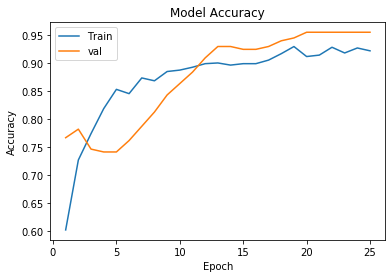

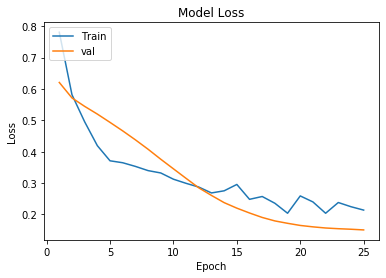

In [43]:
learning_curve(history, 25)